##Importing and Loading CSV

In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('vivino.csv')

In [2]:
# Check the first few rows of the dataset to confirm it's loaded correctly
print(df.head(10).to_string(index=False), end="")  # Print all rows without adding a newline


                     Winery  Year  Wine ID                                  Wine  Rating  num_review  price Country     Region
                  Viña Oria  2019  1812139                         Garnacha 2019     3.5         327   2.50  España   Cariñena
                      Ayuso  2017  2084964           Abadia del Roble Tinto 2017     2.9          52   2.54  España  La Mancha
          Castillo de Liria  2020  1643745                   Bobal - Shiraz 2020     3.4          85   2.56  España   Valencia
          Castillo de Liria  2019  1643745                   Bobal - Shiraz 2019     3.6         305   2.56  España   Valencia
 Finca Venta de Don Quijote  2020  7166356              Tempranillo - Syrah 2020     3.6         129   2.72  España   Castilla
    Schenk Spanish Wineries  2019  1884409                 Vega Libre Tinto 2019     3.2         304   2.90  España   Valencia
                     Antaño  2020  1401663                Rioja Tempranillo 2020     3.3         141   2.95  Es

In [3]:
# Check the last few rows of the dataset to confirm it's loaded correctly
print(df.tail(10))

                                 Winery  Year  Wine ID  \
8640                     Bodegas Olarra  2015    76303   
8641  R. López de Heredia Viña Tondonia  2013  1529357   
8642                   Baltasar Gracián  2014    76948   
8643                       Carlos Ruben  2017  7270546   
8644                 Federico Paternina  2013  1175426   
8645                             Loxera  2017  1895952   
8646  Vinos del Viento - Michael Cooper  2015  5049890   
8647                              Luzon  2018  1230455   
8648                           Tridente  2018  2185839   
8649                   Bodega de Bardos  2016  6773233   

                                    Wine  Rating  num_review  price Country  \
8640  Cerro Añon Rioja Gran Reserva 2015     4.4          86   12.9  España   
8641                   Viña Cubillo 2013     3.9         232   12.9  España   
8642                        Reserva 2014     4.0          80   12.9  España   
8643              Sin Duda Garnacha 2017     

In [4]:
#CLEANING THE DATA

# Check for missing values
print(df.isnull().sum())

# If missing values exist, we can either fill them or drop rows/columns
# For simplicity, we'll drop rows with missing values
df = df.dropna()

# Check for duplicates
df = df.drop_duplicates()

# Ensure correct data types
df.dtypes

Winery        0
Year          0
Wine ID       0
Wine          0
Rating        0
num_review    0
price         0
Country       0
Region        0
dtype: int64


Winery         object
Year           object
Wine ID         int64
Wine           object
Rating        float64
num_review      int64
price         float64
Country        object
Region         object
dtype: object

In [5]:
# Basic overview of the dataset
print(df.info())

# Summary statistics of numerical columns
print(df.describe())

# Distribution of target variable
print(df['price'].value_counts())

# Correlation matrix to check relationships between features
correlation_matrix = df.corr()
print(correlation_matrix)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2024
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Winery      2018 non-null   object 
 1   Year        2018 non-null   object 
 2   Wine ID     2018 non-null   int64  
 3   Wine        2018 non-null   object 
 4   Rating      2018 non-null   float64
 5   num_review  2018 non-null   int64  
 6   price       2018 non-null   float64
 7   Country     2018 non-null   object 
 8   Region      2018 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 157.7+ KB
None
            Wine ID       Rating    num_review        price
count  2.018000e+03  2018.000000   2018.000000  2018.000000
mean   2.759297e+06     3.694995    321.930624     8.674073
std    2.274814e+06     0.222506   1035.124164     2.453832
min    1.615000e+03     2.400000     25.000000     2.500000
25%    1.205627e+06     3.600000     49.000000     6.850000
50%    1.72410

In [6]:
#Visualization 
%pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


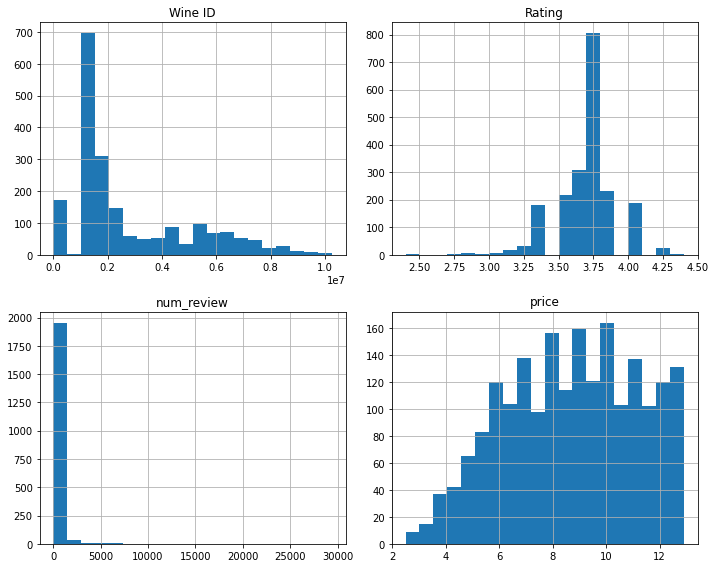

In [7]:
# Histogram of all features
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

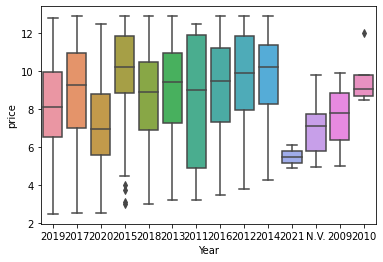

In [8]:
# Boxplot of Year vs Price
sns.boxplot(x='Year', y='price', data=df)
plt.show()

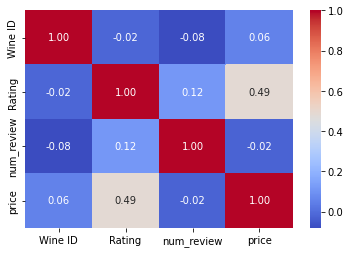

In [9]:
# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



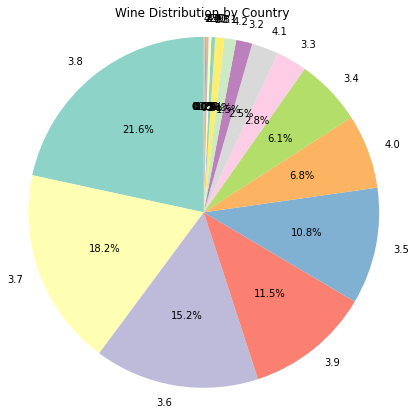

In [10]:
# Pie Chart (Distribution of 'rating' in the dataset)
# Assuming 'Region' is a categorical column
country_counts = df['Rating'].value_counts()  # Get count of wines by country
plt.figure(figsize=(7, 7))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(country_counts)))
plt.title("Wine Distribution by Country")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

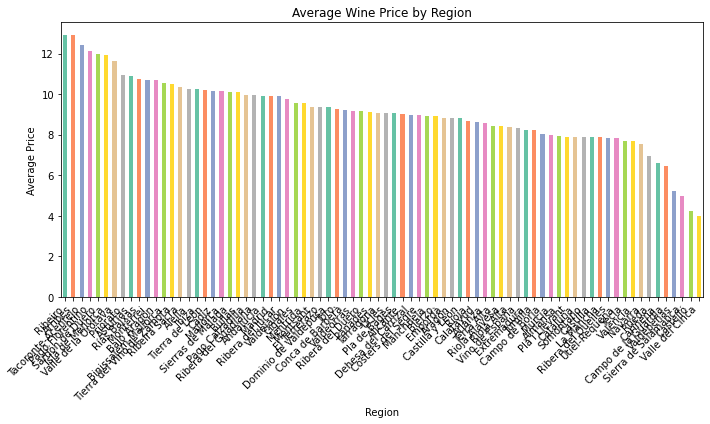

In [11]:
# Bar Chart (Average Price by Region)
# Assuming 'Region' is a categorical column and 'price' is numerical
avg_price_by_region = df.groupby('Region')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_price_by_region.plot(kind='bar', color=sns.color_palette("Set2", len(avg_price_by_region)))
plt.title("Average Wine Price by Region")
plt.xlabel("Region")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


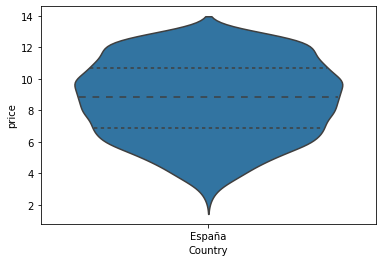

In [12]:
# Violin plot to show distribution across categories
sns.violinplot(x='Country', y='price', data=df, inner='quart')
plt.show()

<Figure size 1440x720 with 0 Axes>

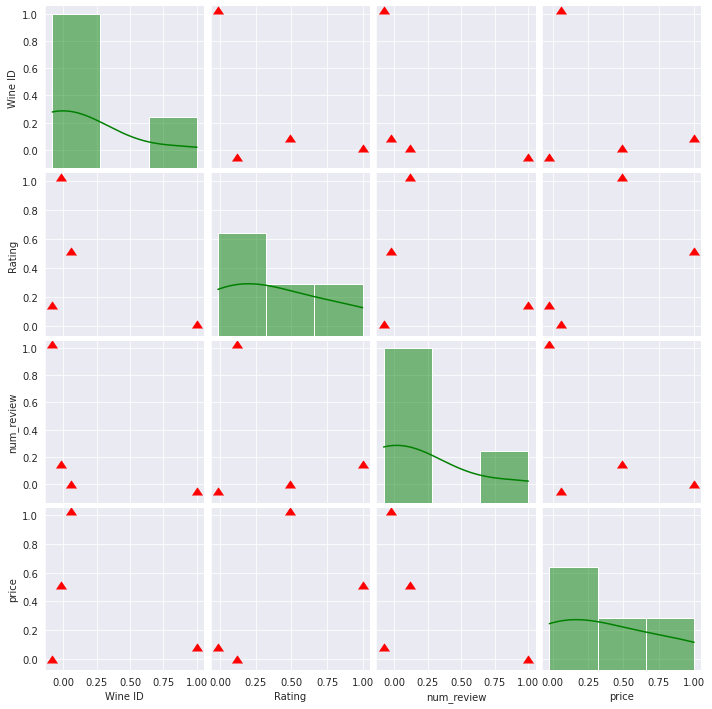

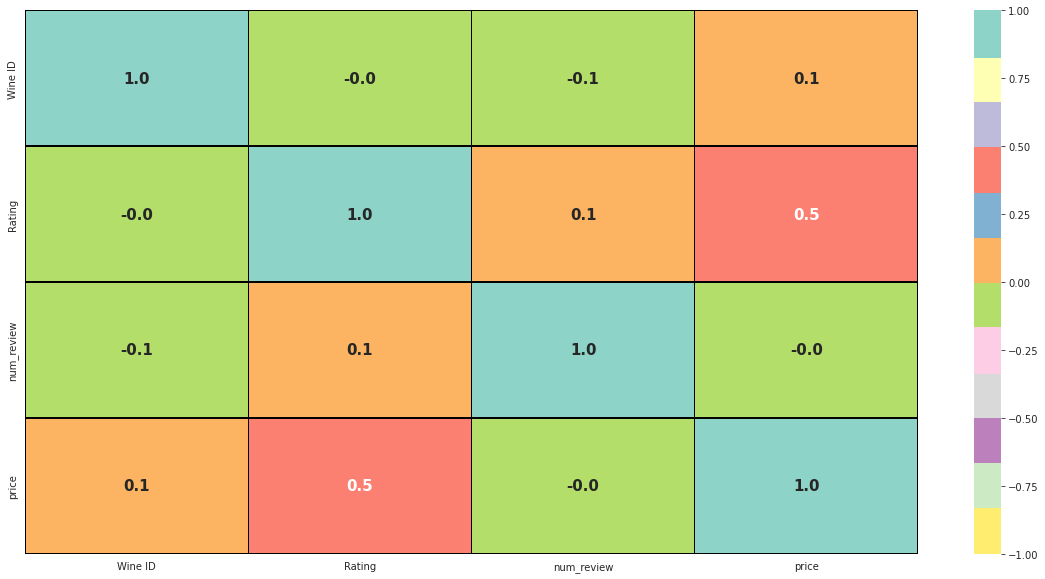

In [36]:
def correlation(df):
    sns.set_style('darkgrid')
    correlations  = df.corr()
    plt.figure(figsize=(20,10))
    sns.pairplot(data=correlations, diag_kws=dict(color='green', kde=TabError), plot_kws=dict(color='red', marker=10, s=100))
    plt.show()
    plt.figure(figsize=(20,10))
    sns.heatmap(correlations, vmin=-1, vmax=1, center=0, cmap='Set3_r', annot=True, fmt='.1f', annot_kws=dict(size=15, weight='bold'), linecolor='black', linewidth=.5)
    plt.show()

correlation(df)

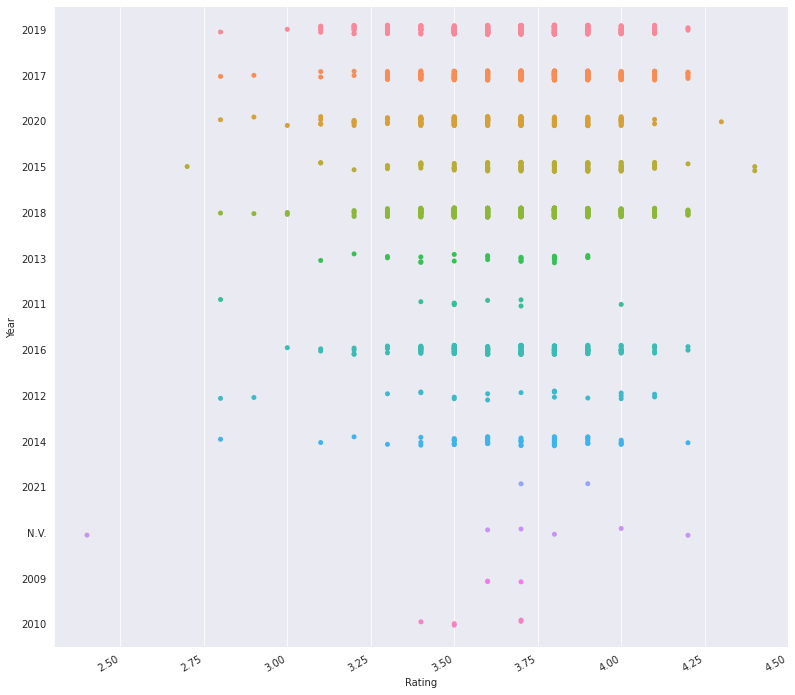

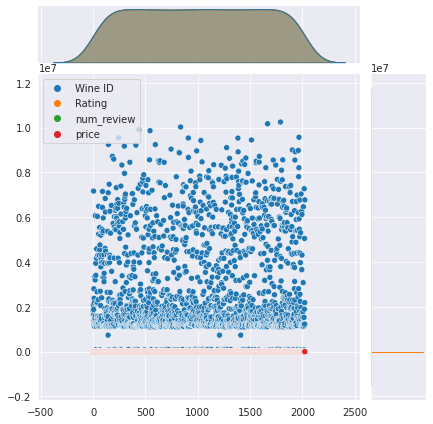

In [37]:
def Year(df):
    ax = sns.catplot(x='Rating', y='Year', data=df,orient="h",height=11.30)
    ax.fig.autofmt_xdate()
    plt.show()
 
Year(df)

sns.jointplot(data=df)
plt.show()

In [38]:
!pip install scikit-learn
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

     |████████████████████████████████| 22.2 MB 1.5 MB/s            MB 6.8 MB/s eta 0:00:03��████████████████████▍ | 21.1 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 309 kB 49.2 MB/s            


In [39]:
# Ensure that 'year' and 'price' are numerical (convert if needed)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric if necessary
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Convert to numeric if necessary

In [40]:
# Drop rows with missing values
df = df.dropna()

# Prepare features (X) and target (y)
X = df[['Year']]  # Feature is the 'year'
y = df['price']   # Target is the 'price'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


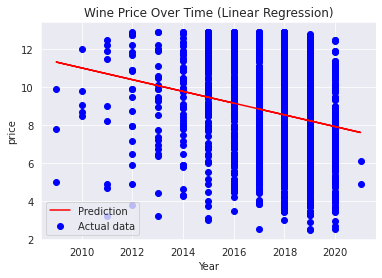

In [41]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Visualizing the results
plt.scatter(X, y, color='blue', label='Actual data')  # Actual data points
plt.plot(X_test, y_pred, color='red', label='Prediction')  # Predicted data points
plt.title("Wine Price Over Time (Linear Regression)")
plt.xlabel("Year")
plt.ylabel("price")
plt.legend()
plt.show()


In [42]:
# Print model coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient (Slope): {model.coef_[0]}')

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Predicting for specific years
predicted_price_2075 = model.predict([[2075]])
print(f"Predicted wine price for 2075: {predicted_price_2075[0]}")

Intercept: 631.9816459512574
Coefficient (Slope): -0.3089339993556362
Mean Squared Error (MSE): 5.438224721307111
Root Mean Squared Error (RMSE): 2.332000154654178
R-squared: 0.06303698883466691
Predicted wine price for 2075: -9.056402711687724
